95% Bootstrap Confidence Interval for the Mean of 'Blood_Health_Score':
Lower Bound: 69.00
Upper Bound: 76.10


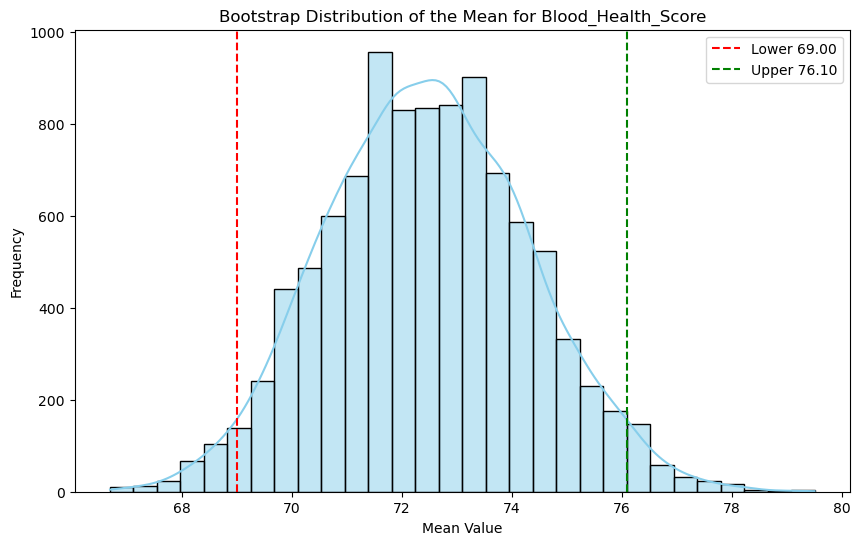

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bootstrap_confidence_interval(data, num_bootstrap=10000, confidence_level=0.95):
    """
    Calculate the bootstrap confidence interval for the mean.
    
    Parameters:
    - data: array-like, the data for which to calculate the confidence interval.
    - num_bootstrap: int, number of bootstrap samples.
    - confidence_level: float, the confidence level for the interval.
    
    Returns:
    - (lower_bound, upper_bound): tuple of floats representing the confidence interval.
    - bootstrap_means: array of bootstrap means.
    """
    data = np.array(data)
    bootstrap_means = np.empty(num_bootstrap)
    n = len(data)
    
    
    #We can change the bootstrap_means[i] = np.mean(sample) to bootstrap_medians[i] = np.median(sample) 
    #if we want to change the statistic to medians
    for i in range(num_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(sample)
    
    #We would then have to change all the variables and arrays from bootstrap_means to bootstrap_medians
    
    
    lower_percentile = ((1.0 - confidence_level) / 2.0) * 100
    upper_percentile = (confidence_level + ((1.0 - confidence_level) / 2.0)) * 100
    
    lower_bound = np.percentile(bootstrap_means, lower_percentile)
    upper_bound = np.percentile(bootstrap_means, upper_percentile)
    
    return lower_bound, upper_bound, bootstrap_means

# Step 2: Create the sample dataset
data = {
    'Participant_ID': ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010'],
    'Age': [25, 34, 45, 52, 29, 38, 41, 33, 47, 36],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Multivitamin_Taken': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Duration_Days': [90, 0, 180, 60, 0, 120, 0, 150, 200, 0],
    'Vitamin_Dose_mg': [100, 0, 150, 120, 0, 130, 0, 110, 140, 0],
    'Blood_Health_Score': [75, 65, 80, 70, 68, 78, 66, 74, 82, 67],
    'Energy_Level_Score': [80, 70, 85, 75, 72, 82, 69, 78, 88, 73],
    'Immune_Response': ['Improved', 'Stable', 'Enhanced', 'Improved', 'Stable', 'Enhanced', 'Stable', 'Improved', 'Enhanced', 'Stable']
}

df = pd.DataFrame(data)

# Step 4: Choose the variable
variable = 'Blood_Health_Score'
data_variable = df[variable]

# Step 5: Calculate the confidence interval
num_bootstrap_samples = 10000
confidence_level = 0.95

lower, upper, bootstrap_means = bootstrap_confidence_interval(data_variable, num_bootstrap_samples, confidence_level)

print(f"{int(confidence_level*100)}% Bootstrap Confidence Interval for the Mean of '{variable}':")
print(f"Lower Bound: {lower:.2f}")
print(f"Upper Bound: {upper:.2f}")

# Step 6: Plot the bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.axvline(lower, color='red', linestyle='--', label=f'Lower {lower:.2f}')
plt.axvline(upper, color='green', linestyle='--', label=f'Upper {upper:.2f}')
plt.title(f'Bootstrap Distribution of the Mean for {variable}')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Doing these changes will alllow a bootstrap confidence interval for the population median

1. The standard deviation is a scale that determines the spread of data points around the mean of the original population. The standard error of the mean (SEM) measures the precision of the sample, which means the estimate of the population's mean if the sample mean is repeated many times. So, standard deviation captures the spread of actual observations, whereas by inferencing the estimates of the mean from samples many times, the SEM is used to reflect the accuracy of these estimates.


6.

1. Bootstrapping is an artificial way of simulating an experiment repeatedly to save time and costs. So, imagine you have a population of people who ate a multivitamin and said they felt stronger after taking it and a group of people who said they did not feel any different after taking it. From this sample of data alone, we wouldn't be able to say, "Oh, 60% of the sample said they felt better, so boom, multivatim works". Instead, what could we do, more confidently, if the multivitamins work by randomly generating the same number of Datta points and then recording these made-up data points? Repeating and doing this process, say thousands of times, will create a confidence interval, in which we can then make a more educated guess as to whether the multivitamins had an effect. This process is, in essence, what bootstrapping is.

2. The primary purpose of bootstrapping is to confidently estimate the sampling distribution of a statistic (i.e. like, a mean or median). You do this when the population distribution is unknown, so you use a sample of that distribution and transform it to represent the population distribution with bootstrapping sort of.

3. I would bootstrap my sample size, say about 10000 times, calculate the average each time, and record the information. I would then use this data to construct a 95% confidence interval using 2-3 standard deviations. Afterward, if I see that my hypothesis is within the confidence interval, I can conclude that the sample data is consistent with my hypothesis on the population average. Otherwise, if my hypothesis lies outside the interval, then it may not be so plausible that it is the population average.

8.

Alitech has created a new vaccine in pursuits of making lives better. They provided a data sample, including a patient ID, age, gender, initial health score, and final health score. In this analysis, a null hypothesis is that the vaccine does not work. This can be done by bootstrapping the data provided by Alitech. We will find the mean delta of the original data health scores and then, with bootstrapping, create bootstrapped samples to see if the original mean delta is within the 95% confidence interval.

Change in Health Scores:
   PatientID  Change
0          1       2
1          2       8
2          3      -3
3          4       5
4          5       3
5          6       6
6          7       7
7          8      -3
8          9       7
9         10       1

Mean Change (Original Sample): 3.30
Mean Change (Bootstrapped Samples): 3.31


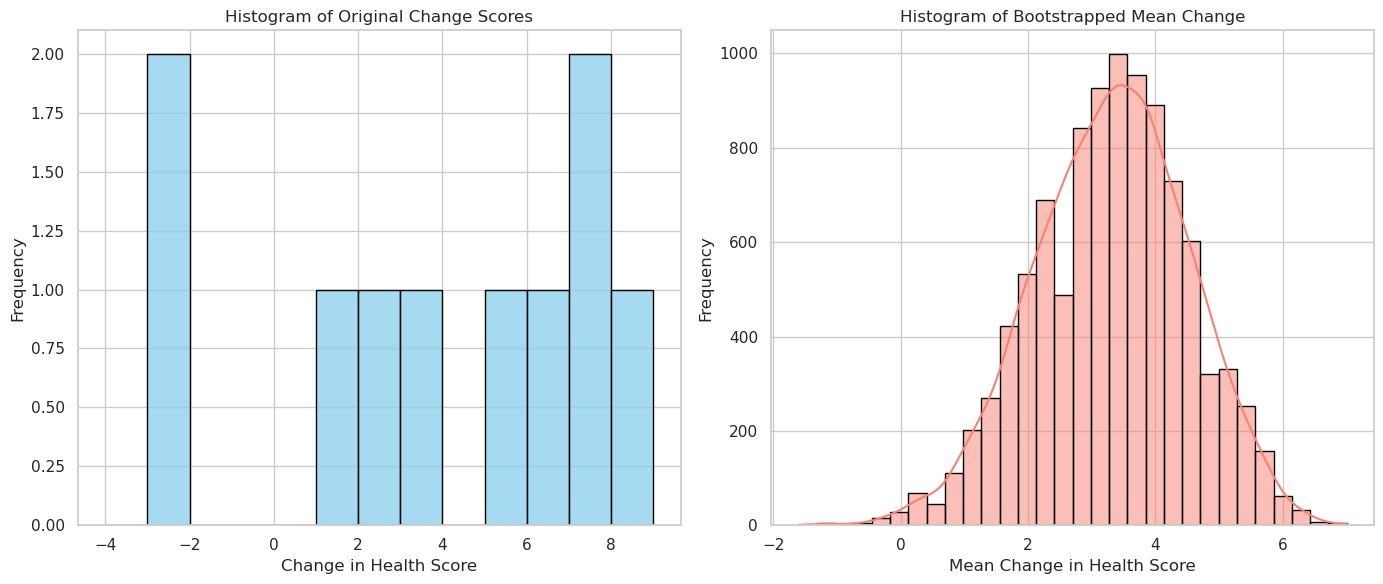

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    'PatientID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [45,34,29,52,37,41,33,48,26,39],
    'Gender': ['M','F','M','F','M','F','M','F','M','F'],
    'InitialHealthScore': [84,78,83,81,81,80,79,85,76,83],
    'FinalHealthScore': [86,86,80,86,84,86,86,82,83,84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate change scores
df['Change'] = df['FinalHealthScore'] - df['InitialHealthScore']
print("Change in Health Scores:")
print(df[['PatientID', 'Change']])

# Mean of original change scores
original_mean = df['Change'].mean()
print(f"\nMean Change (Original Sample): {original_mean:.2f}")

# Set seed for reproducibility
np.random.seed(42)  # You can choose any integer value

# Number of bootstrap samples
n_bootstraps = 10000

# Store bootstrap means
bootstrap_means = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    resample = df['Change'].sample(n=len(df), replace=True)
    bootstrap_means.append(resample.mean())

bootstrap_means = np.array(bootstrap_means)

# Mean of bootstrapped means
bootstrap_mean = bootstrap_means.mean()
print(f"Mean Change (Bootstrapped Samples): {bootstrap_mean:.2f}")

# Plot histograms
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Change Scores Histogram
sns.histplot(df['Change'], bins=range(int(df['Change'].min())-1, int(df['Change'].max())+2), 
             kde=False, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Original Change Scores')
axes[0].set_xlabel('Change in Health Score')
axes[0].set_ylabel('Frequency')

# Bootstrapped Mean Change Histogram
sns.histplot(bootstrap_means, bins=30, kde=True, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Histogram of Bootstrapped Mean Change')
axes[1].set_xlabel('Mean Change in Health Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


After 10000 bootstraps, we can see that the original mean change of the health scores is within the 95% confidence interval and is also very similar to the mean of the bootstraps (mean of means). This shows that a person who is administered the vaccine will, on average, have some positive change in their health scores. Thus, we can conclude that there is no null hypothesis such that the vaccine does work.

We can analyze the data deeper to see if the vaccine's effects on health scores are based on the patient's sex. We can do this just as before, but instead, we can split the data into two histograms for each gender, showcasing the original data and what the bootstrapped data means. 

Change in Health Scores for Male Patients:
   PatientID  Change
0          1       2
1          3      -3
2          5       3
3          7       7
4          9       7

Change in Health Scores for Female Patients:
   PatientID  Change
0          2       8
1          4       5
2          6       6
3          8      -3
4         10       1

Mean Change (Original Sample) - Males: 3.20
Mean Change (Original Sample) - Females: 3.40
Mean Change (Bootstrapped Samples) - Males: 3.26
Mean Change (Bootstrapped Samples) - Females: 3.47


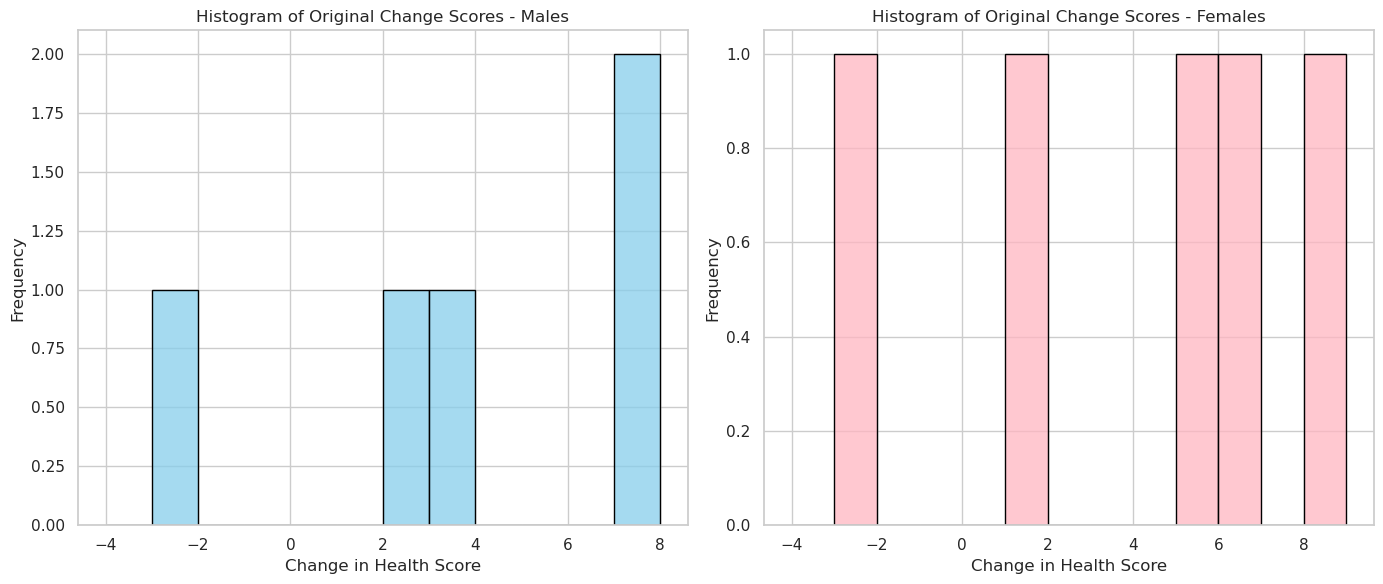

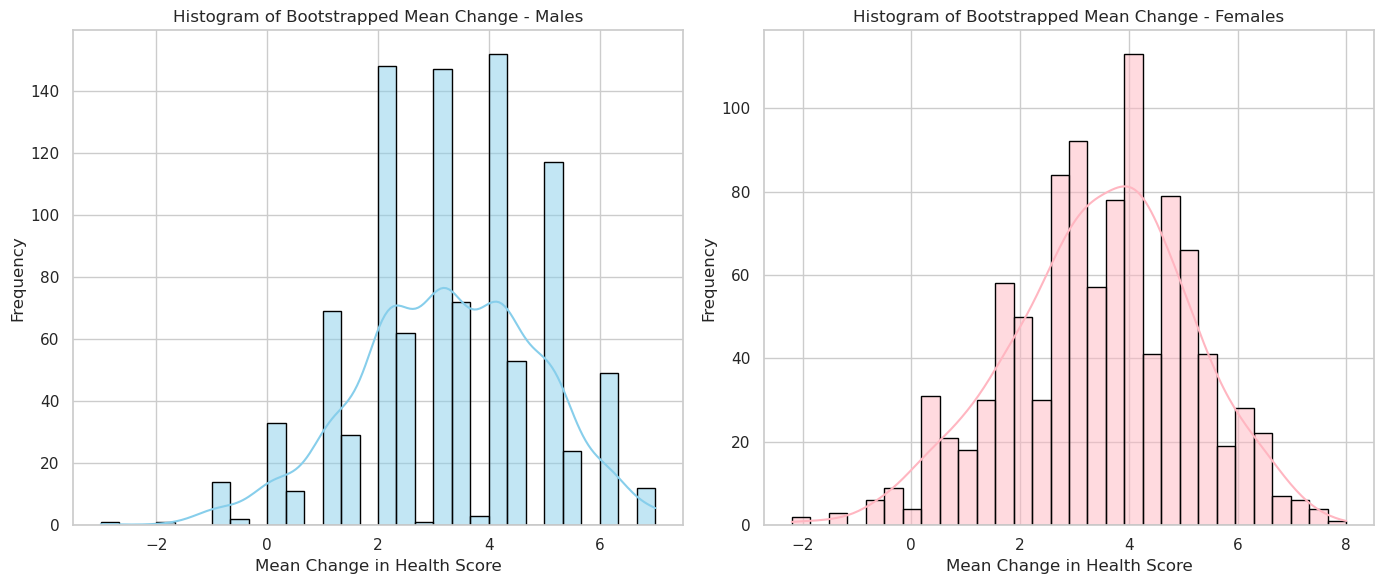

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the data
data = {
    'PatientID': [1,2,3,4,5,6,7,8,9,10],
    'Age': [45,34,29,52,37,41,33,48,26,39],
    'Gender': ['M','F','M','F','M','F','M','F','M','F'],
    'InitialHealthScore': [84,78,83,81,81,80,79,85,76,83],
    'FinalHealthScore': [86,86,80,86,84,86,86,82,83,84]
}

# 2. Create DataFrame
df = pd.DataFrame(data)

# 3. Separate data by Gender
df_male = df[df['Gender'] == 'M'].reset_index(drop=True)
df_female = df[df['Gender'] == 'F'].reset_index(drop=True)

# 4. Calculate change scores
df_male['Change'] = df_male['FinalHealthScore'] - df_male['InitialHealthScore']
df_female['Change'] = df_female['FinalHealthScore'] - df_female['InitialHealthScore']

print("Change in Health Scores for Male Patients:")
print(df_male[['PatientID', 'Change']])

print("\nChange in Health Scores for Female Patients:")
print(df_female[['PatientID', 'Change']])

# 5. Mean of original change scores
original_mean_male = df_male['Change'].mean()
original_mean_female = df_female['Change'].mean()

print(f"\nMean Change (Original Sample) - Males: {original_mean_male:.2f}")
print(f"Mean Change (Original Sample) - Females: {original_mean_female:.2f}")

# 6. Set seed for reproducibility
np.random.seed(42)

# 7. Define bootstrapping function
def bootstrap_mean(data, n_bootstraps=10000):
    bootstrap_means = []
    for _ in range(n_bootstraps):
        resample = data.sample(n=len(data), replace=True)
        bootstrap_means.append(resample.mean())
    return np.array(bootstrap_means)

# Perform bootstrapping for males
bootstrap_means_male = bootstrap_mean(df_male['Change'], n_bootstraps=1000)

# Perform bootstrapping for females
bootstrap_means_female = bootstrap_mean(df_female['Change'], n_bootstraps=1000)

# 8. Mean of bootstrapped means
bootstrap_mean_male = bootstrap_means_male.mean()
bootstrap_mean_female = bootstrap_means_female.mean()

print(f"Mean Change (Bootstrapped Samples) - Males: {bootstrap_mean_male:.2f}")
print(f"Mean Change (Bootstrapped Samples) - Females: {bootstrap_mean_female:.2f}")

# 9. Plot histograms

# Set plot style
sns.set(style="whitegrid")

# a. Original Change Scores - Males and Females
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Male Change Scores
sns.histplot(df_male['Change'], bins=range(int(df_male['Change'].min())-1, int(df_male['Change'].max())+2), 
             kde=False, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Original Change Scores - Males')
axes[0].set_xlabel('Change in Health Score')
axes[0].set_ylabel('Frequency')

# Histogram for Female Change Scores
sns.histplot(df_female['Change'], bins=range(int(df_female['Change'].min())-1, int(df_female['Change'].max())+2), 
             kde=False, ax=axes[1], color='lightpink', edgecolor='black')
axes[1].set_title('Histogram of Original Change Scores - Females')
axes[1].set_xlabel('Change in Health Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# b. Bootstrapped Mean Change - Males and Females
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Bootstrapped Mean Change - Males
sns.histplot(bootstrap_means_male, bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Bootstrapped Mean Change - Males')
axes[0].set_xlabel('Mean Change in Health Score')
axes[0].set_ylabel('Frequency')

# Histogram for Bootstrapped Mean Change - Females
sns.histplot(bootstrap_means_female, bins=30, kde=True, ax=axes[1], color='lightpink', edgecolor='black')
axes[1].set_title('Histogram of Bootstrapped Mean Change - Females')
axes[1].set_xlabel('Mean Change in Health Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The male and female health score difference means for the original sample was 3.20 and 3.40, respectively. After 10000 bootstraps, the male and female means were 3.26 and 3.47, respectively. The difference between the male and female health score is approximately 6%. Since the difference between males and females is so tiny, we can conclude that the sex of a person receiving the vaccine has little to no effect on how much better they will feel afterwards.

Chat bot summaries: 

Chat bot 1:

Here's a summary of our conversation:

Dataset Request: You asked for a dataset related to the effects of multivitamins.

Sample Dataset Creation: I provided a sample dataset illustrating the effects of multivitamins on various health parameters, including participant demographics, vitamin intake, and health scores.

Finding Real Datasets: I suggested several sources for obtaining real-world datasets on multivitamins, such as Kaggle, NHANES, ClinicalTrials.gov, and others.

Bootstrap Confidence Interval Code: I provided a detailed Python script to calculate a 95% bootstrap confidence interval for the population mean based on the sample dataset. This included steps for data setup, bootstrapping, confidence interval calculation, and visualization of the bootstrap distribution.

Customization and Additional Tips: I included guidance on adapting the script for your own datasets, considerations for sample sizes, reproducibility, and potential performance improvements.

If there's anything specific you'd like to revisit or expand on, just let me know!

Link: https://chatgpt.com/c/66fa2c9b-3144-800c-8054-8ee39dcbdcf0

Chat bot 2:

In this conversation, you provided a dataset with patient information, including their age, gender, initial health score, and final health score, to analyze the effectiveness of a vaccine. You asked for a bootstrapping analysis to calculate the means of the changes in health scores, followed by plotting histograms for both the original and bootstrapped sample data.

Next, you requested separate histograms for men's and women's health score data. Afterward, you asked to further divide the data by age groups (in decades, e.g., 20s, 30s, etc.), and I created histograms for the initial and final health scores for each age group.

Link: https://chatgpt.com/c/66fef5bb-1c44-800c-83f9-1ec13746cf10
